In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
# reading the data
db = pd.read_csv('bikes.csv')

In [3]:
db.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [4]:
db.shape

(191, 5)

In [5]:
db.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

# Data Exploration

### check and remove skewness from dataset by using feature transformation

In [6]:
db_numerics_only = db.select_dtypes(include=np.number)

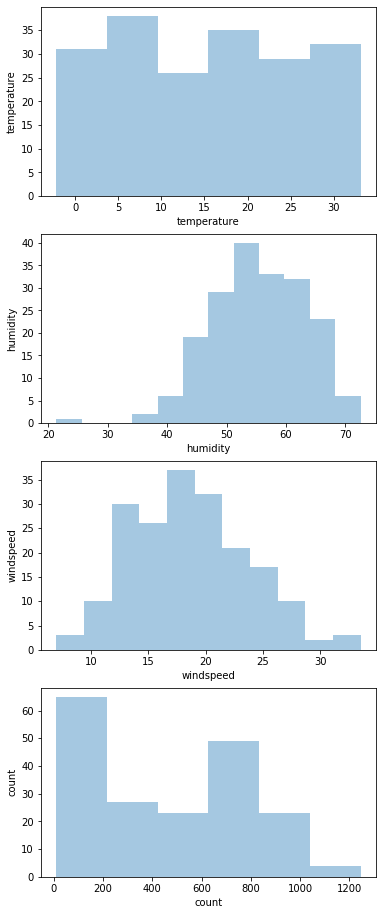

In [7]:
n=len(db_numerics_only.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*4))
#fig, ax = plt.subplots(n,1,2,figsize=(20,n*5))
for i in range(n):
    plt.sca(ax[i])
    col = db_numerics_only.columns[i]
    sns.distplot(db_numerics_only[col].dropna(),kde=False)
    plt.ylabel(col)

here,we can see that all feature of data are well normalised so there is no need to use feature transformation here.

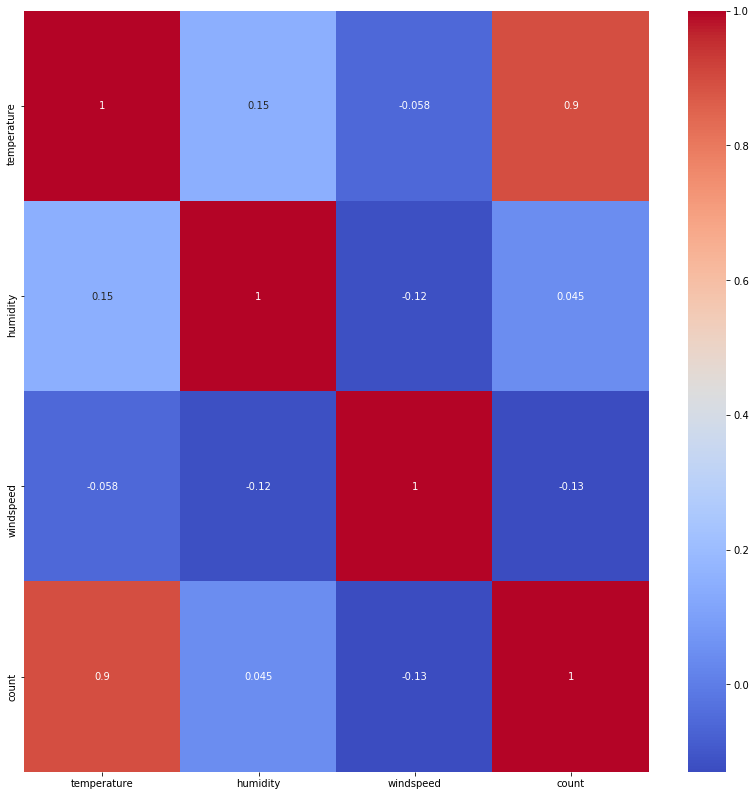

In [8]:
corr = db.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr,annot = True, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap = "coolwarm")

In [9]:
db.corr()

,temperature,humidity,windspeed,count
temperature,1.000000,0.152391,-0.058493,0.897247
humidity,0.152391,1.000000,-0.119008,0.044918
windspeed,-0.058493,-0.119008,1.000000,-0.130064
count,0.897247,0.044918,-0.130064,1.000000


as we can see that the highest correlation between count and temperature is 0.89.

# Quantitative Features vs. Rental Counts
lets create scatter plots of all our float data types and compare them against rental counts to visualize potential relationship

Text(0, 0.5, 'Count of all Biks Rented')

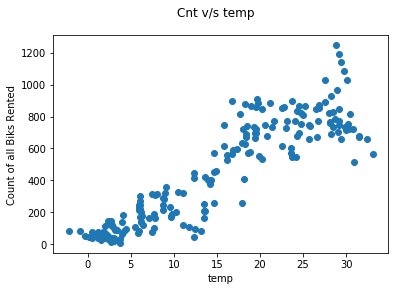

In [10]:
plt.scatter(db['temperature'], db['count'])
plt.suptitle('Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

As per the scatter plot we can see their is a liner relation between number of bike rented and temperature the warmmer the temp the more bike get rented

Text(0, 0.5, 'Count of all Biks Rented')

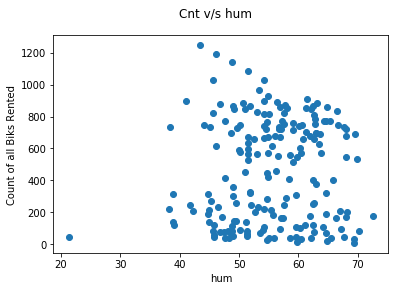

In [11]:
plt.scatter(db['humidity'], db['count'])
plt.suptitle('Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

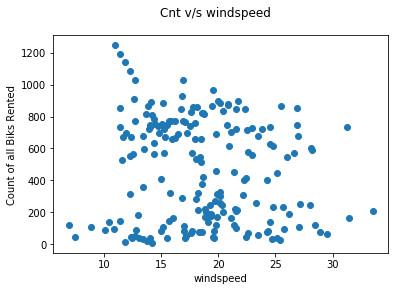

In [12]:
plt.scatter(db['windspeed'], db['count'])
plt.suptitle('Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

For  humidity looks like a big blob throught the edges so show some sparseness. and for feature 'windspeed' shows inverse relationship with rentals

# Modeling

In [13]:
X=db.drop(['date','count'],axis=1)
Y=db['count']

In [14]:
#spliting data into train and test portion
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [15]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()

In [16]:
#training model in training set
lr_model.fit(X_train, Y_train)
# making predection using the test set
y_pred = lr_model.predict(X_test)

In [17]:
#root mean squared error
print('RMSE:%.2f' % sqrt(mean_squared_error(Y_test, y_pred)))

RMSE:143.68


## find best parametrers using GridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [46]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    #print(model,parameters)
    
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True, n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_RMSE = mean_squared_error(y_test, y_pred, squared=False)
    train_RMSE = mean_squared_error(y_train, train_y_pred, squared=False)
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_RMSE across ALL models:\n",
          train_RMSE)
                                    
    print("\n The test_RMSE across ALL models:\n",
          test_RMSE) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************
[15:57:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.2, verbosity=1)

 The best score across ALL searched params:
 0.8831924511390667

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample'

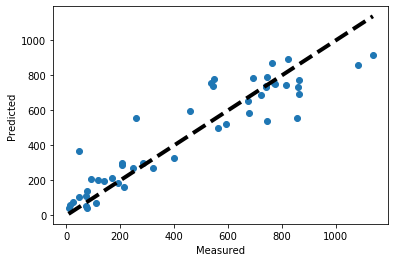

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8802812362594612

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimat

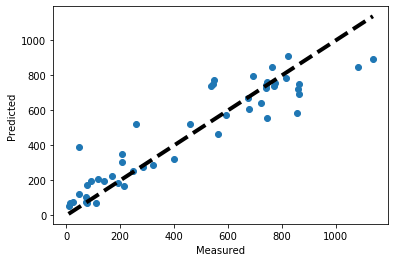

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8580521817094925

 The best parameters across ALL searched params:
 {'max_depth': 6, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 45}

 The train_RMSE across ALL models:
 55.28254055504399

 The test_RMSE across ALL models:
 124.34798665449102


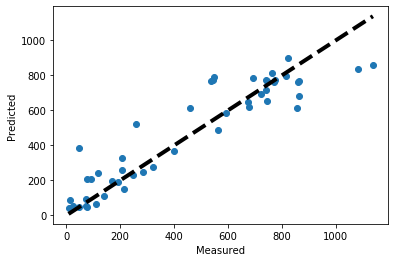

None



In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
alg = [XGBRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
                
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              {'max_depth'    : [4,6,8],
              'n_estimators' : [100,500,1000],
              'min_samples_leaf':[1,2,3],
              'random_state': [40,45,50]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, Y_test,X_train,Y_train,parameters[i])

## bar plot of features importances

[10:51:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


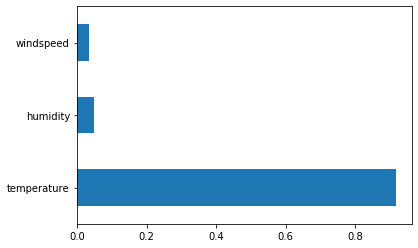

In [18]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,Y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

from this graph we can see that the most important feature for this model is 'temperature'.

## save model

In [19]:
import pickle

In [20]:
filename='bike_sharing-intervention_GradientBoostingRegressor_model.sav'

In [21]:
pickle.dump(model, open(filename, 'wb'))

In [22]:
load_lr_model =pickle.load(open(filename, 'rb'))

[10:51:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
